 Introduction

In this Project we are going to learn how to build a model through a method which is quite different from the normal traditional method or so called raw method used in other Machine Learning Works. The drawback of traditional method is that a lot of time is wasted in data pre-processing, feature selection, model selection, hyper parameter tuning etc.. These days many Auto ML frameworks are available which can be easily pip installed and used very effectively. A lot of time-consuming works can be simply done with a couple of lines. In the majority of cases model accuracy level is more in this than the model which is made using the traditional method.


About the datasets

In this dataset file containing the gene expression levels of 54676 genes (columns) from 130 samples (rows).There are 4 different types of brain cancer (plus healthy tissue) represented in this dataset (column "type").

They are 
  1.ependymoma 
  2.glioblastoma 
  3.medulloblastoma 
  4.pilocytic_astrocytoma

Remote source:http://sbcb.inf.ufrgs.br/carbm/static/cumida/Genes/Brain/GSE50161/Brain_GSE50161.csv
CSV file containing the gene expression levels of 54676 genes (columns) from 130 samples (rows). There are 4 different types of brain cancer (plus healthy tissue) represented in this dataset (column "type"). More information about this dataset, as well as other file formats such as TAB and ARFF, data visualization, and classification and clustering benchmarks are freely available at the official CuMiDa website under the id GSE50161:




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
# this program is aming at evaluating the result with correlation coefficient
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB



# Collecting data

In [2]:

#data = pd.read_csv('Liver Patient Dataset (LPD)_train.csv')
#da=pd.read_csv('Liver Patient Dataset')
data=pd.read_csv('Brain_GSE50161.csv')


In [3]:
data.head(5)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [4]:
data['type'].value_counts()

ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: type, dtype: int64

In [5]:
##statistical summary
print(data.describe())

          samples   1007_s_at     1053_at      117_at      121_at   1255_g_at  \
count  130.000000  130.000000  130.000000  130.000000  130.000000  130.000000   
mean   898.500000   12.276393    8.769583    7.722634    9.160209    4.842069   
std     37.671829    0.790160    0.673396    1.037339    0.615369    0.922003   
min    834.000000   10.156207    6.627878    6.222515    8.044421    3.682762   
25%    866.250000   11.679721    8.378760    7.007678    8.595505    4.207043   
50%    898.500000   12.502518    8.786242    7.521674    9.194487    4.462729   
75%    930.750000   12.883374    9.211098    8.249157    9.707397    5.276685   
max    963.000000   13.655639   10.716003   12.054143   10.407136    7.404503   

          1294_at     1316_at     1320_at   1405_i_at  ...  \
count  130.000000  130.000000  130.000000  130.000000  ...   
mean     7.968388    6.800111    6.472452    6.068968  ...   
std      0.630260    0.537431    0.659847    0.904152  ...   
min      6.560920    5

In [6]:
#Separating independant variable and dependent variable("Flow Pattern")
X = data.drop(['type'], axis=1)
y = data['type']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(130, 54676)
(130,)


In [7]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 10)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 54676)
(91,)
(39, 54676)
(39,)


In [8]:
#Scaling X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

# KNN Classification

In [9]:
#Apply KNN classifier.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
 
# Testing the model using X_test and storing the output in y_pred
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array(['normal', 'medulloblastoma', 'ependymoma', 'pilocytic_astrocytoma',
       'pilocytic_astrocytoma', 'glioblastoma', 'glioblastoma',
       'glioblastoma', 'ependymoma', 'ependymoma', 'ependymoma',
       'glioblastoma', 'pilocytic_astrocytoma', 'pilocytic_astrocytoma',
       'ependymoma', 'ependymoma', 'medulloblastoma',
       'pilocytic_astrocytoma', 'ependymoma', 'pilocytic_astrocytoma',
       'medulloblastoma', 'normal', 'ependymoma', 'glioblastoma',
       'ependymoma', 'glioblastoma', 'ependymoma', 'ependymoma',
       'medulloblastoma', 'glioblastoma', 'ependymoma', 'normal',
       'ependymoma', 'ependymoma', 'pilocytic_astrocytoma',
       'pilocytic_astrocytoma', 'normal', 'ependymoma', 'glioblastoma'],
      dtype=object)

In [10]:
# Quantitative evaluation of the model quality on the test set. We will explain these metrics in detail at part c.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn))
score_knn = accuracy_score(y_test, y_pred_knn)
print("accuracy score: %0.3f" % score_knn)

#Creating a confusion matrix ,which compares the y_test and y_pred_knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

                       precision    recall  f1-score   support

           ependymoma       0.93      0.93      0.93        15
         glioblastoma       0.88      0.64      0.74        11
      medulloblastoma       1.00      1.00      1.00         4
               normal       1.00      1.00      1.00         4
pilocytic_astrocytoma       0.50      0.80      0.62         5

             accuracy                           0.85        39
            macro avg       0.86      0.87      0.86        39
         weighted avg       0.88      0.85      0.85        39

0.8461538461538461
accuracy score: 0.846


array([[14,  1,  0,  0,  0],
       [ 0,  7,  0,  0,  4],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0,  4]], dtype=int64)

KNN: 0.813333 (0.086181)


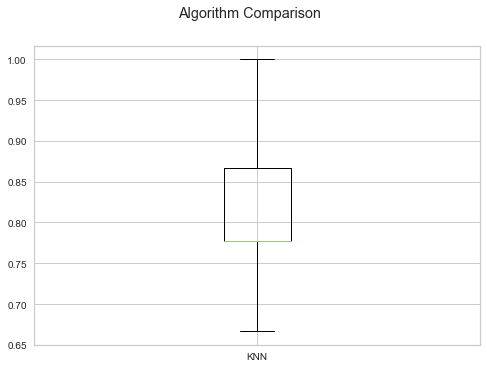

In [11]:
# We evaluate and compare accuracy levels 2 different algorithms (KNN vs. GaussianNB)
# Algorithms (KNN vs. GaussianNB)
from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# There is a population of accuracy measures for each algorithm (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# KNN Classification (applying parameters optimization)

In [12]:
# KNN Classification, apply Grid Search Parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
parameters_k = {"n_neighbors": range(1, 20)}
gridsearch_knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose=1, cv = 10, n_jobs=-1)
gridsearch_knn.fit(X_train_scaled, y_train)

print(gridsearch_knn.best_params_)
 
# Testing the model using X_test and storing the output in y_pred
y_pred_pknn = gridsearch_knn.predict(X_test_scaled)
y_pred_pknn

Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   32.4s finished


{'n_neighbors': 1}


array(['normal', 'medulloblastoma', 'glioblastoma',
       'pilocytic_astrocytoma', 'pilocytic_astrocytoma', 'glioblastoma',
       'ependymoma', 'glioblastoma', 'ependymoma', 'ependymoma',
       'ependymoma', 'glioblastoma', 'pilocytic_astrocytoma',
       'pilocytic_astrocytoma', 'ependymoma', 'ependymoma',
       'medulloblastoma', 'pilocytic_astrocytoma', 'ependymoma',
       'pilocytic_astrocytoma', 'medulloblastoma', 'normal', 'ependymoma',
       'glioblastoma', 'ependymoma', 'pilocytic_astrocytoma',
       'ependymoma', 'ependymoma', 'medulloblastoma', 'ependymoma',
       'ependymoma', 'normal', 'ependymoma', 'ependymoma',
       'pilocytic_astrocytoma', 'pilocytic_astrocytoma', 'normal',
       'ependymoma', 'glioblastoma'], dtype=object)

In [13]:
# Quantitative evaluation of the model quality on the test set. We will explain these metrics in detail at part c.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_pknn))
score_pknn = accuracy_score(y_test, y_pred_pknn)
print("accuracy score: %0.3f" % score_pknn)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pknn))

# Creating  a confusion matrix,which compares the y_test and y_pred_pknn
from sklearn.metrics import confusion_matrix
cm_pknn = confusion_matrix(y_test, y_pred_pknn)
cm_pknn

0.7948717948717948
accuracy score: 0.795
                       precision    recall  f1-score   support

           ependymoma       0.88      0.93      0.90        15
         glioblastoma       0.83      0.45      0.59        11
      medulloblastoma       1.00      1.00      1.00         4
               normal       1.00      1.00      1.00         4
pilocytic_astrocytoma       0.44      0.80      0.57         5

             accuracy                           0.79        39
            macro avg       0.83      0.84      0.81        39
         weighted avg       0.83      0.79      0.79        39



array([[14,  1,  0,  0,  0],
       [ 1,  5,  0,  0,  5],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 1,  0,  0,  0,  4]], dtype=int64)

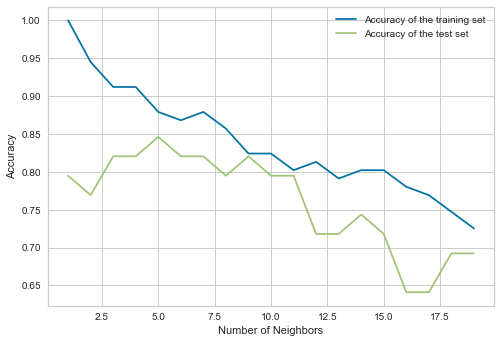

In [14]:
#Once again, we test the result from Grid Search Parameters by applying loop
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 50
neighbors_setting = range(1,20)

for k in neighbors_setting:
    knn_test = KNeighborsClassifier(n_neighbors= k)
    knn_test.fit(X_train_scaled,y_train)
    training_accuracy.append(knn_test.score(X_train_scaled, y_train))
    test_accuracy.append(knn_test.score(X_test_scaled, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In the above graph accuracy of training set is 1 and the accuracy of the test set is 79%

KNN: 0.792222 (0.101355)
Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   13.6s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   15.2s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   14.3s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   13.8s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   13.9s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   14.2s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   14.4s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   14.1s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   14.1s finished


Fitting 10 folds for each of 19 candidates, totalling 190 fits


C:\Users\pushp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:   14.2s finished


KNN_parameter: 0.813333 (0.049889)


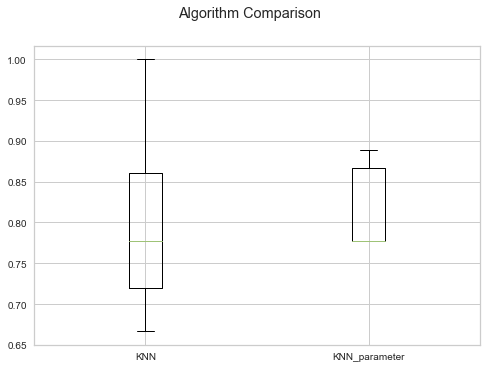

In [15]:
from sklearn import model_selection

models = []
models.append(('KNN',KNeighborsClassifier(3)))
models.append(('KNN_parameter', gridsearch_knn))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# There is a population of accuracy measures for each algorithm (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Select Best Model

We now have 2 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In this case, we can see that it looks like KNN_parameter has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).
In the above boxplot compare Knn algoithem is 79% and KNN_parameter is 81% so KNN_paameter is good perform model.

GB: 0.867778 (0.129810)
KNN: 0.924444 (0.066815)


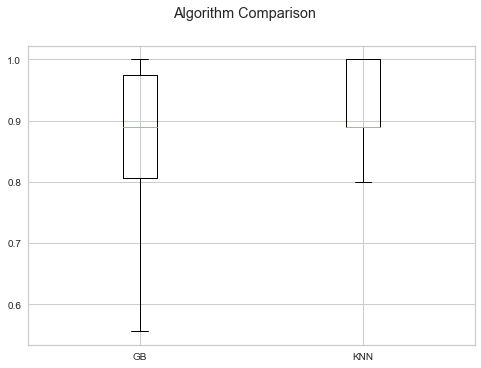

In [16]:
# Let’s evaluate 2 different algorithms:

# Algorithms
seed=7
scoring='accuracy'
models = []
models.append(('GB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Select Best Model

We now have 2 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In this case, we can see that it looks like KNN has the largest estimated accuracy score.

# Multiclass Classification - Measurement metrics

In [17]:
classes=["ependymoma","glioblastoma","medulloblastoma","pilocytic_astrocytoma ","normal"]
# select classifiers 
classifiers=[
KNeighborsClassifier(),
GaussianNB()]
#Write function for class-centric metrics
# Classification report

def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)

In [18]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

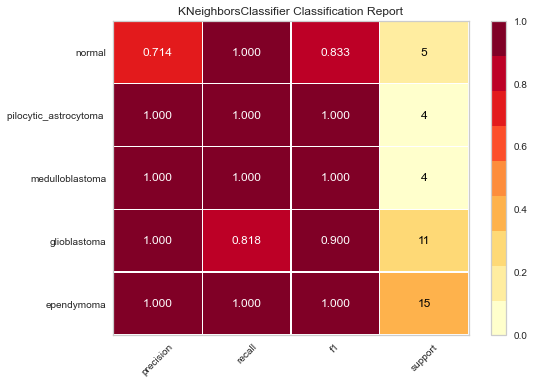

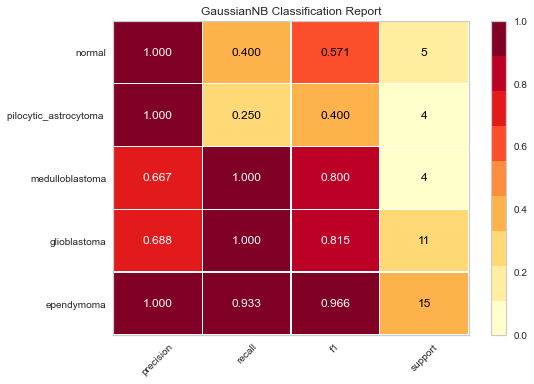

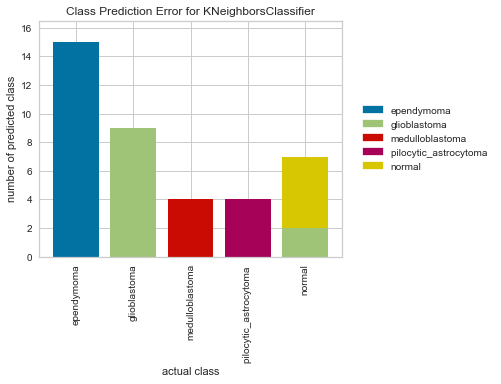

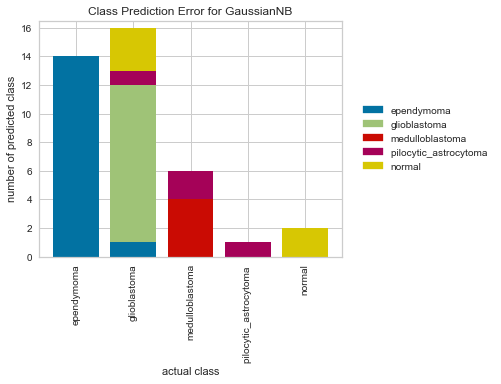

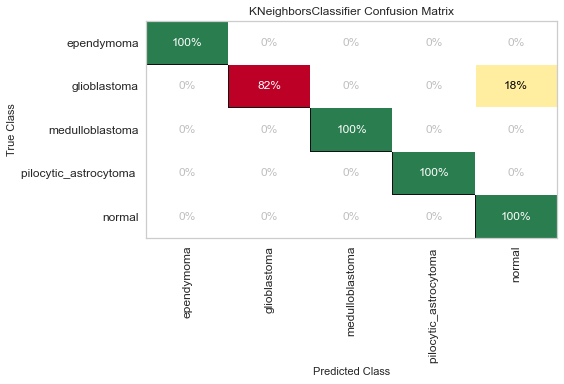

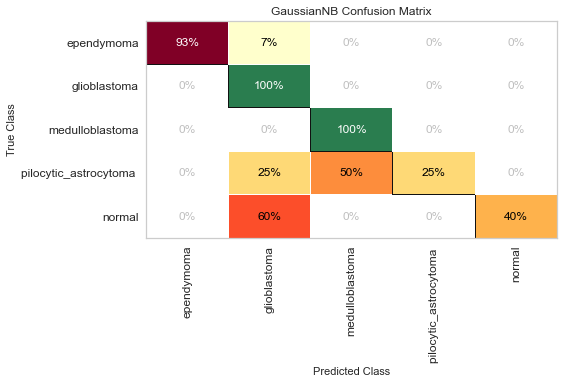

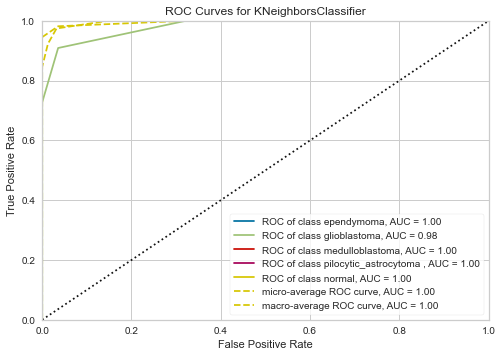

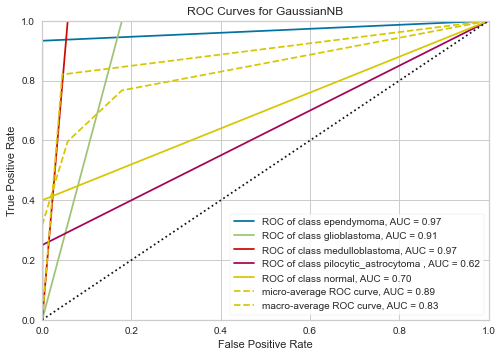

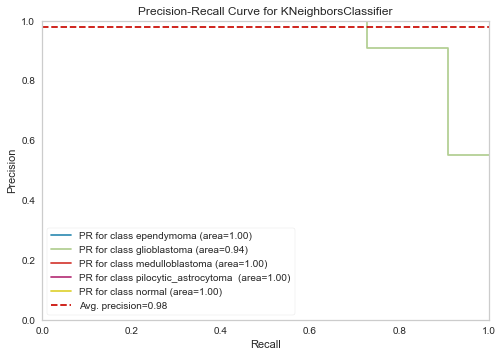

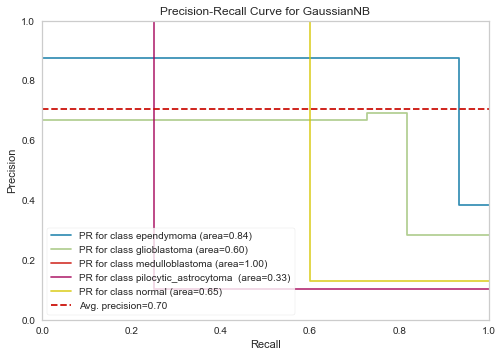

In [19]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [20]:
#Deploy aggregate metrics  
classifier_metrics()

KNeighborsClassifier()
cohen_kappa_score: 0.931
log_loss: 0.208
zero_one_loss: 0.051
hemming_loss: 0.051
matthews_corrcoef: 0.934

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.751
log_loss: 6.199
zero_one_loss: 0.179
hemming_loss: 0.179
matthews_corrcoef: 0.769

------------------------------------------------------


In [21]:

#sns.set_style("whitegrid")
#sns.pairplot(data,hue="type",size=3);
#plt.show()

Rows, Columns: (130, 54677)


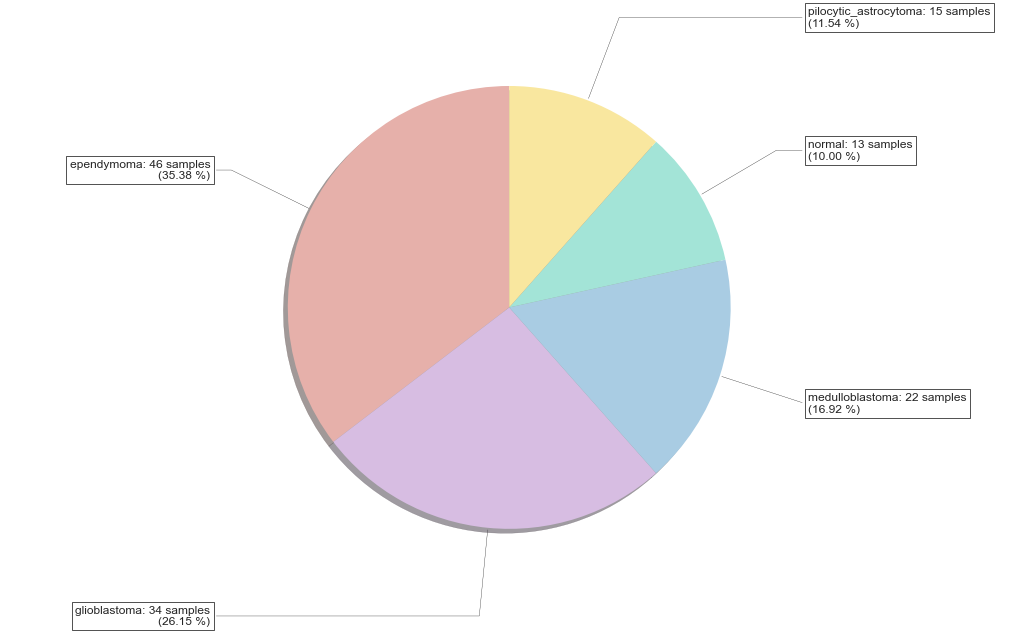

In [22]:
print("Rows, Columns:",data.shape)
Clases = data.groupby('type').size()
labels = Clases.index.values
sizes = Clases.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

# Calculate PCA

In [27]:
X = data.drop(['type'], axis=1)
Y = data['type']

In [28]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc = pca.fit_transform(X)

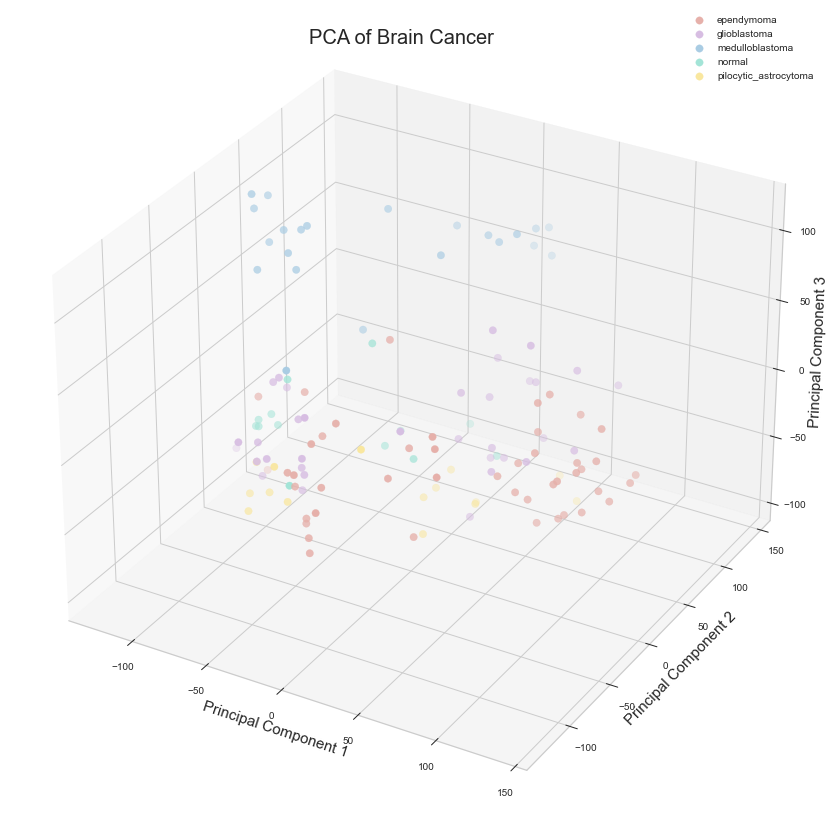

In [29]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
targets = data.type.unique()
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F']
for target, color in zip(targets, colors):
    indicesToKeep = (Y == target)
    pc1 = pc[indicesToKeep].T[0]
    pc2 = pc[indicesToKeep].T[1]
    pc3 = pc[indicesToKeep].T[2]
    ax.scatter3D(pc1, pc2,pc3, c=color, s=55)
ax.legend(targets)
plt.suptitle('PCA of Brain Cancer', y=0.86, fontsize=20)
plt.show();

Aggregate Metrics Summary

Text(0.5, 1.0, 'Brain_GSE Data Summary')

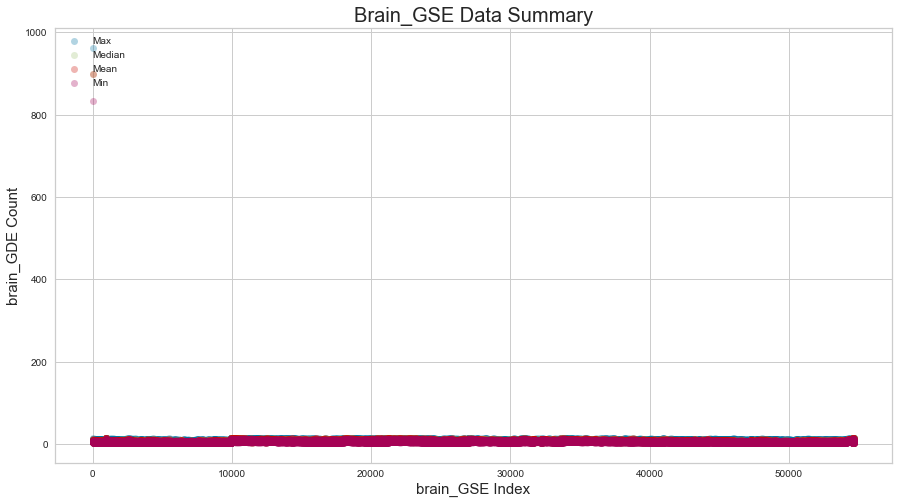

In [31]:

maxs=list(X.max(axis=0))
mins=list(X.min(axis=0))
means=list(X.mean(axis=0))
median=list(X.median(axis=0))
cols=list(X.columns)

summary_df=pd.DataFrame({"Brain cancer":cols,"Max":maxs,"Median":median,"Mean":means,"Min":mins})
summary_df=summary_df.reset_index(drop=True)

fig=plt.gcf()
fig.set_size_inches(15, 8)

sns.scatterplot(x=summary_df.index,y='Max',data=summary_df,linewidth=0,alpha=0.3,label='Max')
sns.scatterplot(x=summary_df.index,y='Median',data=summary_df,linewidth=0,alpha=0.3,label='Median')
sns.scatterplot(x=summary_df.index,y='Mean',data=summary_df,linewidth=0,alpha=0.3,label='Mean')
sns.scatterplot(x=summary_df.index,y='Min',data=summary_df,linewidth=0,alpha=0.3,label='Min')
plt.legend(loc="upper left")
plt.xlabel("brain_GSE Index",fontsize=15)
plt.ylabel("brain_GDE Count",fontsize=15)
plt.title("Brain_GSE Data Summary",fontsize=20)